In [1]:
# Importando todas as bibliotecas necessárias:
import seaborn as sns
import matplotlib.pyplot as plt

# Importando biblioteca ScikitLearn:
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Definição das categorias utilizadas:
categories = ['comp.windows.x', 'comp.os.ms-windows.misc', 'misc.forsale',
             'rec.autos']

# Separação em grupo de TREINAMENTO e TESTE:
train = fetch_20newsgroups(subset = 'train', categories = categories)
test  = fetch_20newsgroups(subset = 'test',  categories = categories)

In [3]:
# Instânciando o CountVectorizer
cv = CountVectorizer()

# Instânciando o Naive Bayes Multinomial
nbm = MultinomialNB()

# Criando a sequencia de ações:
pipeline = make_pipeline(cv, nbm)

In [4]:
# Excutando o treinamento dos dados:
pipeline.fit(train.data, train.target)

# Executando a validação dos dados:
valid = pipeline.predict(test.data)

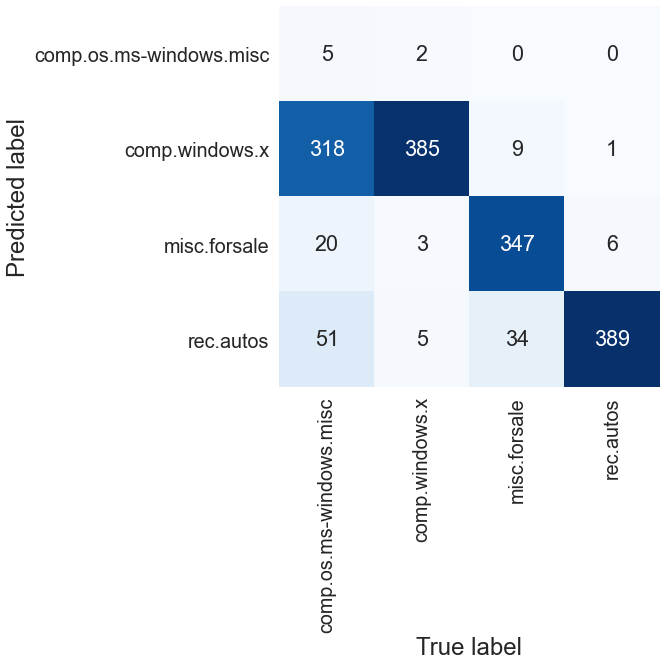

In [5]:
# Plotagem da figura:
fig = plt.figure(figsize=(7,7))
mat = confusion_matrix(test.target, valid)
sns.set(font_scale=1.8)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names, cmap="Blues")
plt.xlabel('True label', fontsize=24)
plt.ylabel('Predicted label', fontsize=24)
plt.show()

##### O que você percebe em relação à classe ‘comp.os.ms-windows.misc’?

Percebe-se que o algorítmo causou certa confusão na classificação das duas classes, causando um certo erro em sua predição.

###### Qual uma possível explicação para o que você percebeu no item anterior?

Deve-se a proximidade entre as classes, pois ambas tratam de assuntos próximos o que pode criar uma predição errada por parte do algorítmo.